# Week 2 Task 2.2 Pandas Exploration NoteBook by Hassan Raza

## Step 2.1,2.2,2.3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Step 2.4 Load train.csv

In [41]:
df = pd.read_csv(r"C:\Users\razak\OneDrive\Desktop\Neuro_App\week2\Titanic\train.csv")
print("Data Loaded")

Data Loaded


In [43]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2.5 Looking for missing values

In [45]:
print("Sum of all null values column wise")
df.isnull().sum()

Sum of all null values column wise


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Step 2.6 Fill/Drop missing values appropiately

In [47]:
#Filling age column missing values according their mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

#Filling Embarked column missing values according their Mode Value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop column Cabin column
df.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Step 2.7 Create new features familysize, Isalone, Title from Name

In [70]:
#Family Size malom krna hai yahan
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
#Agr koe passenger oalena hai boat py uska status
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [72]:
#Name Column sy tiltes extract krny hai ajjaisy Mr, Miss, Master
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [74]:
#Ticket Distribution High class low Class
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

In [76]:
#Age Malom knra Categories ma lane k leye
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

In [78]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr,Low,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs,VeryHigh,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,Medium,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs,VeryHigh,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr,Medium,Adult


## Step 2.8 Df. describe and df.info()

In [99]:
#To find statistcal status of Data
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,0.602694
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000


In [101]:
#To Find general information of data like total columns, data types and null values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  FamilySize   891 non-null    int64   
 12  IsAlone      891 non-null    int64   
 13  Title        891 non-null    object  
 14  FareBin      891 non-null    category
 15  AgeGroup     891 non-null    category
dtypes: category(2), float64(2), int64(7), object(5)
memory usage: 99.7+ KB


# Step 2.9 Charts Section through MATPLOTLIB

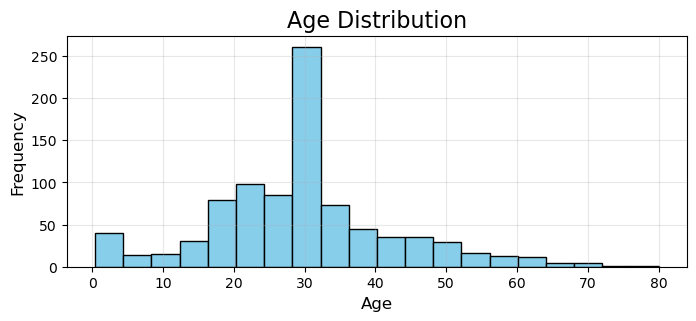

In [110]:
# 1. Histogram for Age Distribution (Matplotlib only)
plt.figure(figsize=(8, 3))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

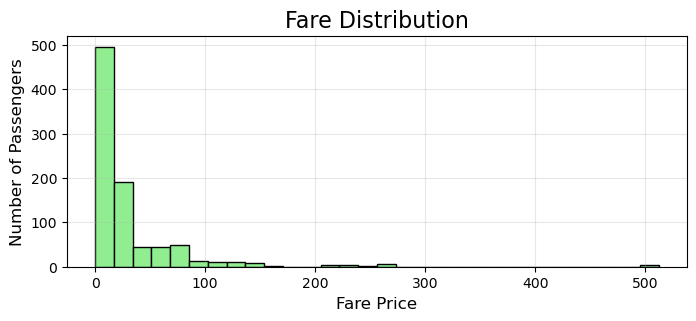

In [120]:
# 2. Histogram for Fare
plt.figure(figsize=(8, 3))
plt.hist(df['Fare'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Fare Distribution', fontsize=16)
plt.xlabel('Fare Price', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

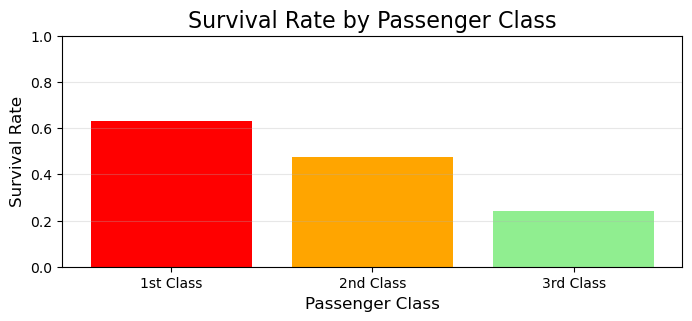

In [116]:
# 3. Bar Chart for Survival Rate by Passenger Class
# Group data
class_survival = df.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(8, 3))
plt.bar(class_survival.index, class_survival.values, color=['red', 'orange', 'lightgreen'])
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])
plt.ylim(0, 1)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

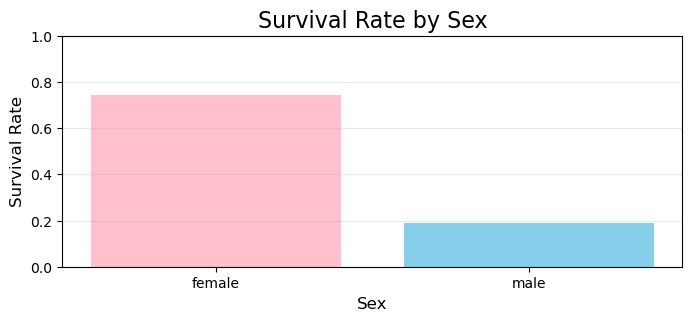

In [124]:
# 1. Survival Rate by Sex
sex_survival = df.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(8, 3))
plt.bar(sex_survival.index, sex_survival.values, color=['pink', 'skyblue'])
plt.title('Survival Rate by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

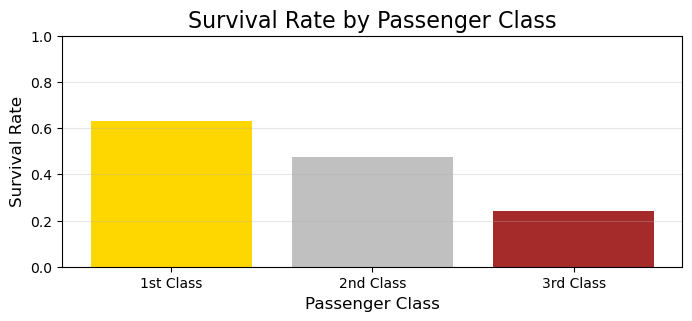

In [128]:
# 2. Survival Rate by Passenger Class (Pclass)
class_survival = df.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(8, 3))
plt.bar(class_survival.index, class_survival.values, color=['gold', 'silver', 'brown'])
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])
plt.ylim(0, 1)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

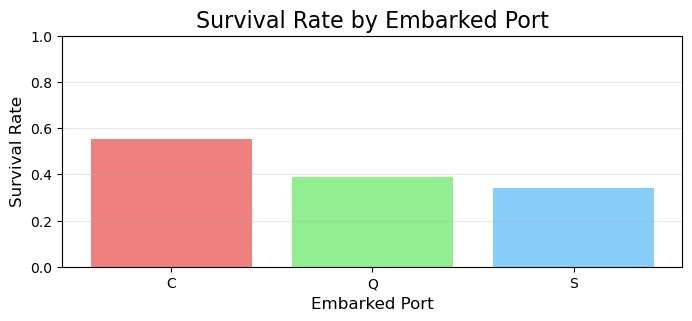

In [130]:
# 3. Survival Rate by Embarked Port
embarked_survival = df.groupby('Embarked')['Survived'].mean()

plt.figure(figsize=(8, 3))
plt.bar(embarked_survival.index, embarked_survival.values, color=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Survival Rate by Embarked Port', fontsize=16)
plt.xlabel('Embarked Port', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

## Step 2.9 Save clean data

In [133]:
# Export cleaned dataset
df.to_csv('titanic_cleaned.csv', index=False)
print("Cleaned dataset successfully saved as 'titanic_cleaned.csv'")

Cleaned dataset successfully saved as 'titanic_cleaned.csv'
